In [22]:
%matplotlib inline
from sklearn.datasets import load_diabetes


In [23]:
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [24]:
print(diabetes.data.shape)
print(diabetes.target.shape)
print(diabetes.feature_names)

(442, 10)
(442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [25]:
import pandas as pd

In [26]:
pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', 9)
pd.set_option('display.width', None)

In [27]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['DiseaseProgression'] = pd.Series(diabetes.target)

diabetes_df.head(5)

,age,sex,bmi,bp,...,s4,s5,s6,DiseaseProgression
0,0.0381,0.0507,0.0617,0.0219,...,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,...,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,...,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,...,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,...,-0.0026,-0.0320,-0.0466,135.0


In [28]:
sample_df = diabetes_df.sample(frac=0.1, random_state=17)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
sns.set_style('whitegrid')
#sns.set(font_scale=2)

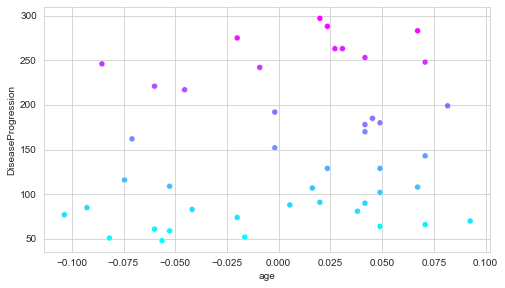

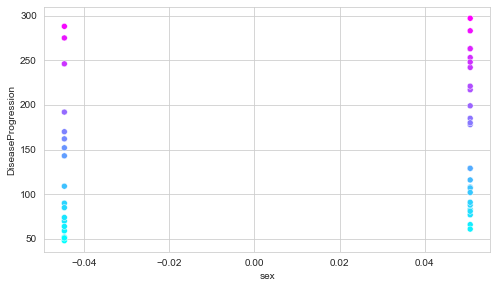

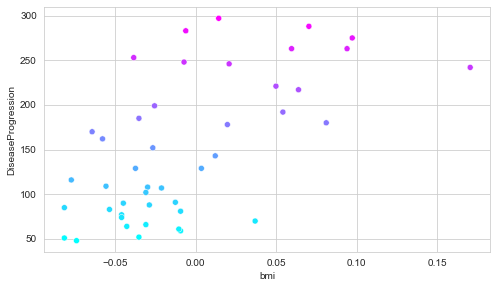

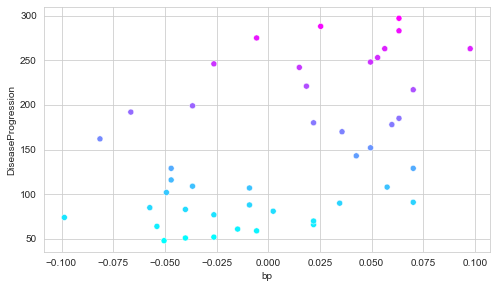

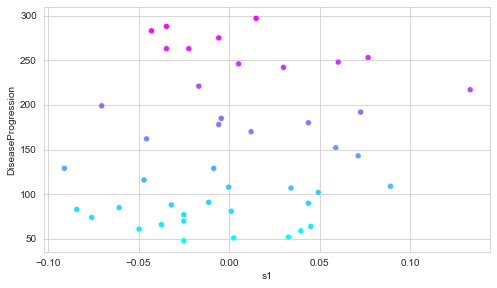

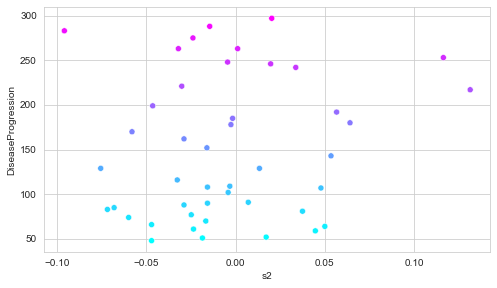

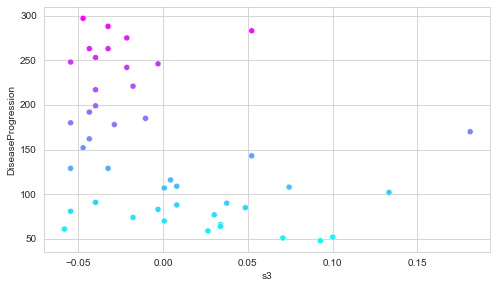

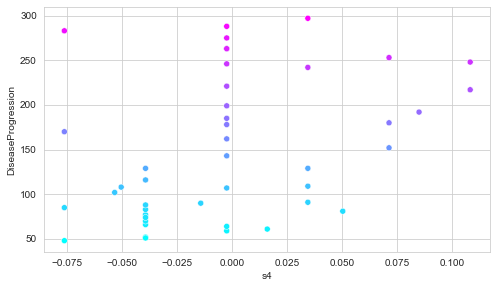

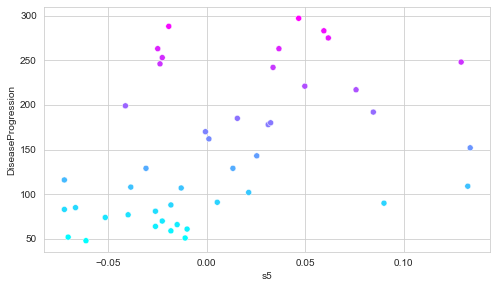

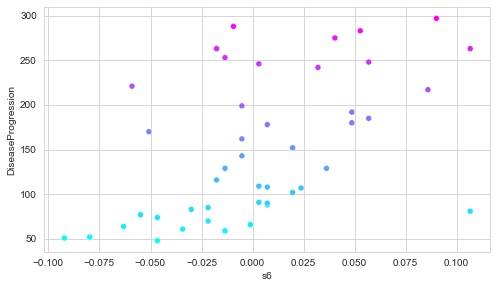

In [31]:
for feature in diabetes.feature_names:
    plt.figure(figsize=(8,4.5))
    sns.scatterplot(data=sample_df, x=feature,y="DiseaseProgression", hue='DiseaseProgression',palette='cool',legend=False)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=11)

print(x_train.shape)
print(x_test.shape)

(331, 10)
(111, 10)


In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
linear_regression = LinearRegression()
linear_regression.fit(X=x_train, y=y_train)

LinearRegression()

In [36]:
for i, name in enumerate(diabetes.feature_names):
    print(f'{name+":":<10} {linear_regression.coef_[i]}')

print(f"{'y-int:':<10} {linear_regression.intercept_}")

age:       -60.22189333188298
sex:       -266.45890749037574
bmi:       523.0596748020045
bp:        310.5148515916694
s1:        -336.17030792548036
s2:        137.34454453829528
s3:        -131.1356042968855
s4:        -1.1485501589057654
s5:        622.3374924905785
s6:        60.46751763603529
y-int:     152.22835839334243


In [37]:
predicted = linear_regression.predict(x_test)
expected = y_test

print(predicted[:5])
print(expected[:5])

[115.46727109  83.46033257 160.77912055 187.65807631  72.72355267]
[ 79.  55. 109. 178.  39.]


In [38]:
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

print(df)

     Expected  Predicted
0        79.0   115.4673
1        55.0    83.4603
2       109.0   160.7791
3       178.0   187.6581
4        39.0    72.7236
..        ...        ...
106     173.0   194.2587
107     140.0   137.1045
108     245.0   159.0793
109     262.0   182.0026
110      42.0    83.0525

[111 rows x 2 columns]


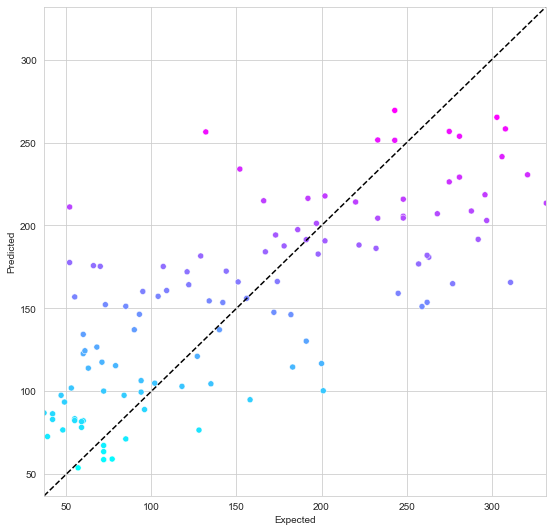

In [39]:
figure = plt.figure(figsize=(9,9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

In [40]:
from sklearn import metrics

metrics.r2_score(expected, predicted)

0.5322440129151977

In [42]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
}

In [43]:
from sklearn.model_selection import KFold, cross_val_score

In [54]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=diabetes.data, y=diabetes.target, cv=kfold, scoring='r2')
    print(f'{estimator_name:>16}: mean of r2 scores = {scores.mean(): .3f}')

LinearRegression: mean of r2 scores =  0.475
      ElasticNet: mean of r2 scores = -0.002
           Lasso: mean of r2 scores =  0.339
           Ridge: mean of r2 scores =  0.421
